<h1>Modelo de Regresion Logistica: Titanic Dataset</h1>

<h3>Presentado por: Cristian Mateo Samboni Muñoz</h3>

In [132]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [134]:
Datos = pd.read_csv('D:/Titanic-Dataset.csv')

In [136]:
Datos.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [138]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
print("Cantidad de registros sin numero de identificación:", Datos['PassengerId'].isin([" "]).sum())

survived_mayor_1 = (Datos['Survived'] > 1).sum()
print("Cantidad de registros con numeros mayores a 1 (por que 0 es muerto y 1 vivo):", survived_mayor_1)

pclass_mayor_3 = (Datos['Pclass'] > 3).sum()
print("Cantidad de registros con numeros mayores a 3 (por que van de primera a tercera clase):", pclass_mayor_3)

age_mayor_150 = (Datos['Age'] > 150).sum()
print("Cantidad de registros con edades mayores a 150:", age_mayor_150)

age_null = (Datos['Age'].isnull()).sum()
print("Cantidad de registros nulos en la edad: ", age_null)

embarked_null = (Datos['Embarked'].isnull().sum())
print("Cantidad de registro nulos en embarque: ", embarked_null)

Cantidad de registros sin numero de identificación: 0
Cantidad de registros con numeros mayores a 1 (por que 0 es muerto y 1 vivo): 0
Cantidad de registros con numeros mayores a 3 (por que van de primera a tercera clase): 0
Cantidad de registros con edades mayores a 150: 0
Cantidad de registros nulos en la edad:  177
Cantidad de registro nulos en embarque:  2


In [142]:
Datos['Age'] = Datos['Age'].mask(Datos['Age'].isnull(), Datos['Age'].mean())
age_null = (Datos['Age'].isnull()).sum()
print("Cantidad de registros nulos en la edad: ", age_null)

Datos['Embarked'] = Datos['Embarked'].mask(Datos['Embarked'].isnull(), Datos['Embarked'].mode()[0])
embarked_null = (Datos['Embarked'].isnull().sum())
print("Cantidad de registros nulos en embarque: ", embarked_null)

Cantidad de registros nulos en la edad:  0
Cantidad de registros nulos en embarque:  0


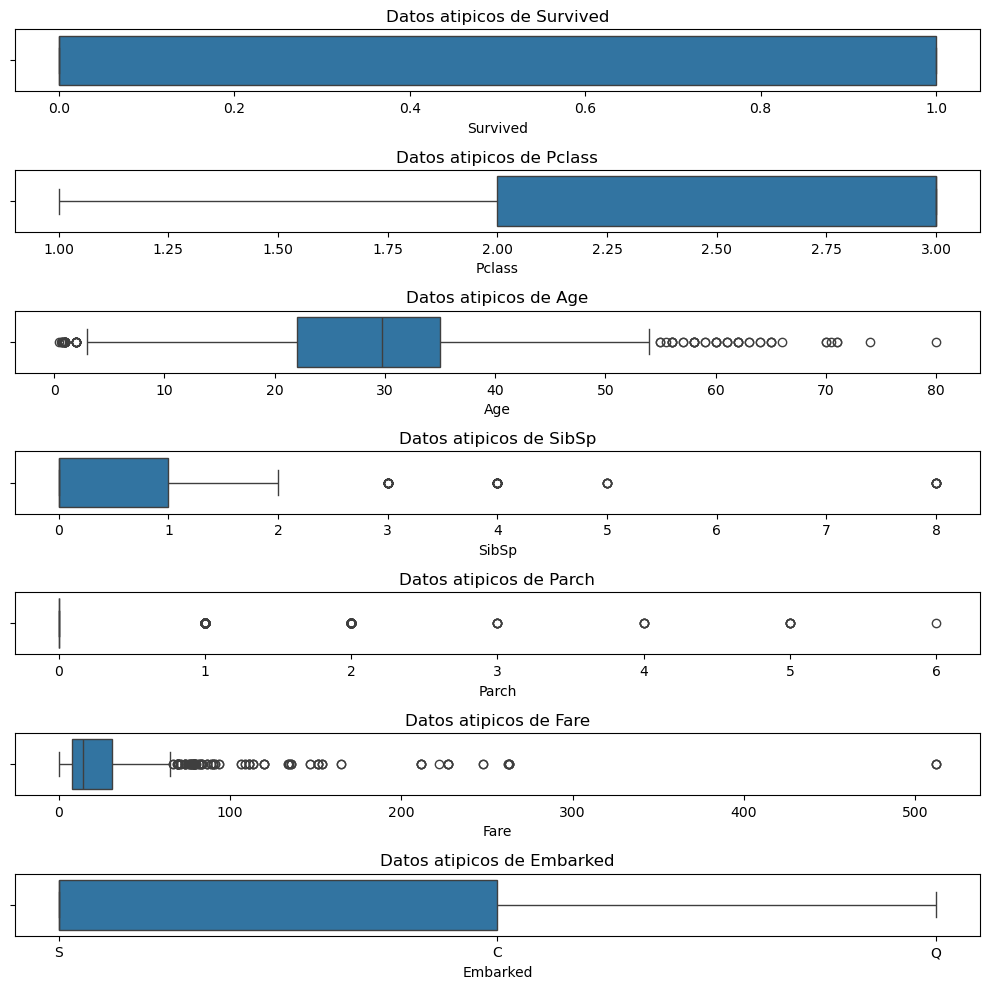

In [144]:
def grafica_atipicos(dato, columna, ax):
    sns.boxplot(x = Datos[columna], ax = ax)
    ax.set_title("Datos atipicos de " + columna)
fig, axs = plt.subplots(7, 1, figsize = (10, 10))

grafica_atipicos(Datos, 'Survived', axs[0])
grafica_atipicos(Datos, 'Pclass', axs[1])
grafica_atipicos(Datos, 'Age', axs[2])
grafica_atipicos(Datos, 'SibSp', axs[3])
grafica_atipicos(Datos, 'Parch', axs[4])
grafica_atipicos(Datos, 'Fare', axs[5])
grafica_atipicos(Datos, 'Embarked', axs[6])

plt.tight_layout()
plt.show()

In [145]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
Datos['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [150]:
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [152]:
Datos['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [154]:
# 1 hombre y 0 mujer
convertir_sex = LabelEncoder() 
Datos['Sex'] = convertir_sex.fit_transform(Datos['Sex'])

In [156]:
Datos['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [158]:
Datos['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [160]:
Datos['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [162]:
Datos['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [164]:
Datos['Fare'].value_counts() #Precio pagado en libras esterlinas 

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [166]:
Datos['Embarked'].value_counts() # S=Southampton, C=Cherbourg, Q=Queenstown

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [168]:
entrenar = Datos[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
probar = Datos['Survived']

entrenar_train, entrenar_test, probar_train, probar_test = train_test_split(entrenar, probar, test_size = 0.20, stratify = probar, random_state = 0)

In [170]:
print(entrenar_train)

     Pclass  Sex        Age  SibSp  Parch
502       3    0  29.699118      0      0
464       3    1  29.699118      0      0
198       3    0  29.699118      0      0
765       1    0  51.000000      1      0
421       3    1  21.000000      0      0
..      ...  ...        ...    ...    ...
131       3    1  20.000000      0      0
490       3    1  29.699118      1      0
528       3    1  39.000000      0      0
48        3    1  29.699118      2      0
80        3    1  22.000000      0      0

[712 rows x 5 columns]


In [172]:
print(probar_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


In [174]:
smote = SMOTE(random_state = 42)
entrenar_train_res, probar_train_res = smote.fit_resample(entrenar_train, probar_train)

modelo_regresion = LogisticRegression(C = 0.1, class_weight = 'balanced', solver = 'liblinear')
modelo_regresion.fit(entrenar_train_res, probar_train_res)

modelo_predictivo = modelo_regresion.predict(entrenar_test)

In [176]:
print(modelo_predictivo)

[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0]


In [178]:
print(classification_report(probar_test, modelo_predictivo))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



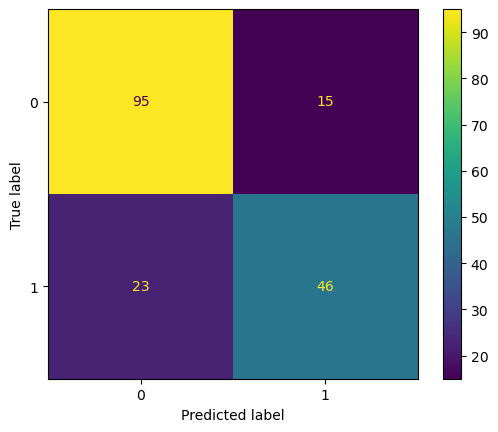

In [180]:
matriz = confusion_matrix(probar_test, modelo_predictivo)
grafica_matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz)
grafica_matriz.plot()

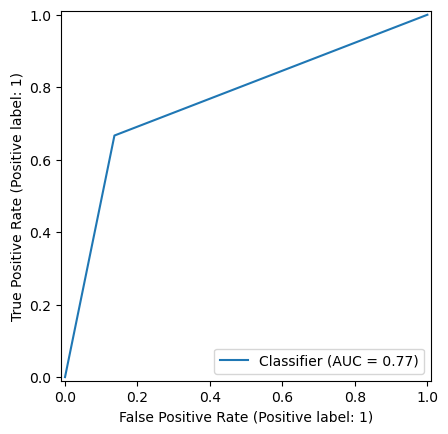

In [182]:
RocCurveDisplay.from_predictions(probar_test, modelo_predictivo)
plt.show()

<h1>Analisis del modelo de regresion logistica: Test de desempeño del modelo</h1>

In [185]:
print(classification_report(probar_test, modelo_predictivo))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



<h3>Precision</h3>
<h4>0 = 81%</h4>
<h4>1 = 75%</h4>
<h5>La precision mide la proporcion d epredicciones positivas correctas tanto en el si como en el no</h5>
<h5>Para el caso 0, la precision es del 81% lo cual indica que el modelo se desempeña de buena manera</h5>
<h5>Para el caso 1, la precision es del 75% lo cual indica que esta entre un rango razonablemente bueno</h5>

<h3>Recall</h3>
<h4>0 = 86%</h4>
<h4>1 = 67%</h4>
<h5>El recall mide la proporcion de verdaderos positivos que el modelo identifica correctamente</h5>
<h5>Para el caso 0, el recall es del 86% lo cual indica que el modelo se desempeña de buena manera</h5>
<h5>Para el caso 1, el recall es del 67% lo cual indica que tiene algo de dificultad para identificar correctamente la instancia 1</h5>

<h3>F1 - Score</h3>
<h4>0 = 83%</h4>
<h4>1 = 71%</h4>
<h5>El F1 - Score es la media entre el recall y recision, esta prueba nos da una mejor idea del rendimiento en general del modelo</h5>
<h5>Para el caso 0, el F1 - Score es del 83% lo que indica que el modelo esta bien equilibrado</h5>
<h5>Para el caso 1, el F1 - Score es del 71% lo que indica que el modelo tiene un rango razonable pero tambien con posibilidad de mejorar</h5>

<h3>Accuracy</h3>
<h4>Valor = 79%</h4>
<h5>El accuracy es el porcentaje de predicciones realizadas de manera correcta con respecto al total de las predicciones realizadas</h5>
<h5>Con un valor del 79% tiene un buen rendimiento a nivel general</h5>

<h3>Macro AVG</h3>
<h4>Macro AVG de Precision = 76%</h4>
<h4>Macro AVG de Recall = 77%</h4>
<h4>Macro AVG de F1 - Score = 76%</h4>
<h5>El Macro AVG es el promedio no ponderado y el que tengan estos valores, deja claro que el modelo tiene un buen desempeño en ambas predicciones como 0 y 1 pero tiene opciones de mejora</h5>

<h3>Weighted AVG</h3>
<h4>Weighted AVG de Precision = 79%</h4>
<h4>Weighted AVG de Recall = 79%</h4>
<h4>Weighted AVG de F1 - Score = 78%</h4>
<h5>El Weighted AVG es el promedio ponderado tomando en cuenta la proporcion de las clases de los datos. En este caso el modelo tiene un buen rendimiento y equilibio en ambas metricas</h5>

<h1>Analisis del modelo de regresion logistica: Matriz de Confusion</h1>

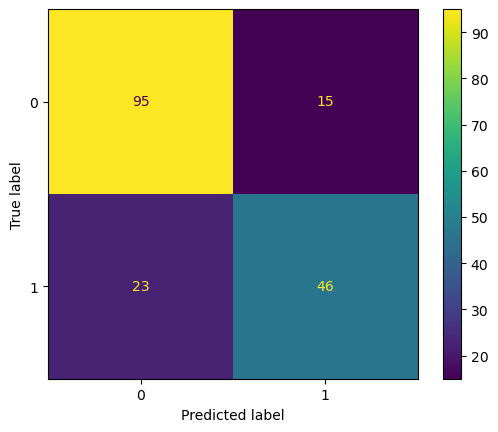

In [194]:
matriz = confusion_matrix(probar_test, modelo_predictivo)
grafica_matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz)
grafica_matriz.plot()

<h3>Verdaderos Negativos (TN) = 95</h3>
<h4>Predice de manera correcta 95 instancias pertenecientes a 0</h4>

<h3>Falsos Positivos (FP) = 15</h3>
<h4>Predice de manera correcta 15 instancias pertenecientes a 1</h4>

<h3>Falsos Negativos (FN) = 23</h3>
<h4>No predijo de manera correcta 23 instancas pertenecientes a 0</h4>

<h3>Verdaderos Positivos (TP) = 46</h3>
<h4>El modelo predijo correctamente 46 instancias pertenecientes a 1</h4>

<h4>Tras realizar el analisis de la matriz de confusion, en el caso de las predicciones de 0 el modelos se desempeña de manera correcta</h4>
<h4>Para el caso de las predicciones de 1 el modelo tuvo 23 errores lo cual nos sugiere que se debera elegir otro ripo de modelo para realizar el analisis</h4>

<h1>Analisis del modelo de regresion logistica: Area bajo la curva</h1>

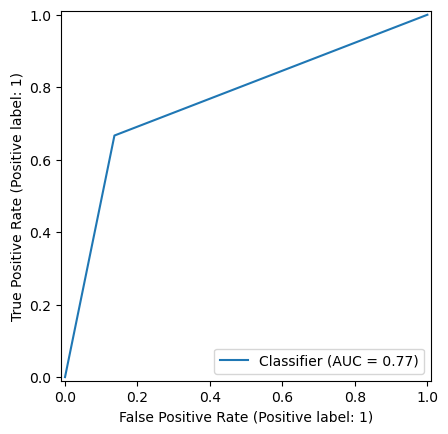

In [199]:
RocCurveDisplay.from_predictions(probar_test, modelo_predictivo)
plt.show()

<h3>El area bajo la curva va desde 0 (valor malo) a 1 (el mejor valor), por tanto, el area bajo la curva es del 0,77 lo cual nos indica que el rendimiento del modelo a nivel general en cuanto a clasificar correctamente una instancia positiva frente a las negativas haciendo que el modelo sea bueno pero con opciones a mejorar</h3>